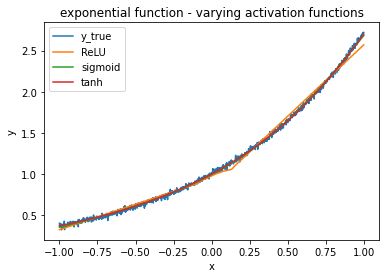

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neural_network import Network
from layers import fcLayer, classLayer, regLayer 

# training data
#x_train = np.array([[0,0,1,1], [0,1,0,1]]) # m - no of features and n - no of instances
#y_train = np.array([[0,1,1,0]]) 

x_train = np.expand_dims(np.linspace(-1,1,1000),axis=0) #-1 to 0 and 0.75 to 1.5
#x_test  =  #0 to 0.75

m = x_train.shape[1]
y_train = np.exp(x_train) + 0.02*np.random.randn(1,m)

plt.plot(x_train.T, y_train.T, label='y_true')
actfn_list = ['ReLU','sigmoid','tanh']
nN = len(actfn_list)
for i in range(nN):
    actfn = actfn_list [i]
    fcnet = Network()
    fcnet.add(fcLayer(1, 10,actfn))
    fcnet.add(regLayer(10, 1,'linear'))
    fcnet.optimizer(eta=0.2, lamda=10, regularizer ='none') #L1
    # train
    [train_loss, test_loss] = fcnet.fit(x_train, y_train, x_train, y_train, batch_size = 8, epochs=2500)
    # test
    predictions = fcnet.predict(x_train)
    plt.plot(x_train.T, predictions.T, label=actfn)

plt.xlabel("x")
plt.ylabel("y")
plt.title("exponential function - varying activation functions")
plt.legend()
plt.savefig('exponential_actfns.jpeg', dpi=800)
plt.show()

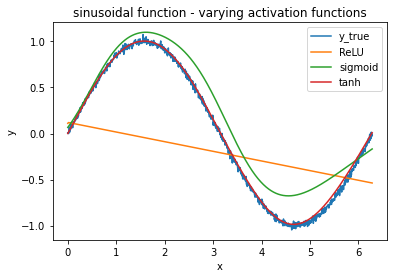

In [6]:
x_train = np.expand_dims(np.linspace(0,2*np.pi,1000),axis=0) #-1 to 0 and 0.75 to 1.5
#x_test  =  #0 to 0.75

m = x_train.shape[1]
y_train = np.sin(x_train) + 0.02*np.random.randn(1,m)

plt.plot(x_train.T, y_train.T, label='y_true')
actfn_list = ['ReLU','sigmoid','tanh']
eta_list = [0.00001,0.2,0.2]
nN = len(actfn_list)
for i in range(nN):
    actfn = actfn_list [i]
    eta = eta_list[i]
    fcnet = Network()
    fcnet.add(fcLayer(1, 10,actfn))
    fcnet.add(regLayer(10, 1,'linear'))
    fcnet.optimizer(eta=eta, lamda=10, regularizer ='none') #L1
    # train
    [train_loss, test_loss] = fcnet.fit(x_train, y_train, x_train, y_train, batch_size = 8, epochs=2500)
    # test
    predictions = fcnet.predict(x_train)
    plt.plot(x_train.T, predictions.T, label=actfn)

plt.xlabel("x")
plt.ylabel("y")
plt.title("sinusoidal function - varying activation functions")
plt.legend()
plt.savefig('sinusoidal_actfns_lr0.1.jpeg', dpi=800)
plt.show()

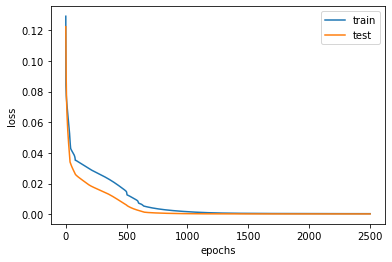

In [3]:
# plotting the execution time versus N
N = np.arange(1,train_loss.shape[0]+1)
plt.plot(N, train_loss, label='train')
plt.plot(N, test_loss, label='test')

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()